<a href="https://colab.research.google.com/github/dfu2020/ATMS597_Project6_groupF/blob/master/Project6_NN_MOD08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Required Libraries



In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt  
import glob
import xarray as xr
!pip install netcdf4
!pip install pydap

!apt-get -qq install libproj-dev proj-data proj-bin libgeos-dev
!pip install Cython
!pip install --upgrade --force-reinstall shapely --no-binary shapely
!pip install cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.ticker as mticker

In [0]:
from google.colab import drive
drive.mount('/content/drive')

# !mkdir '/content/drive/My Drive/project6_data/'

Mounted at /content/drive


In [0]:
!ls '/content/drive/My Drive'

## Gathering MODIS Data

Due to the sheer volume of the MODIS data, this part of the project was not done on Google Colab. Should be fairly self-explanatory, though!

In [0]:
# Read MODIS Level 3 monthly data into lat/long demarcated csv files 

# import glob
# import os
# import matplotlib as mpl
# import matplotlib.pyplot as plt
# import numpy as np
# from pyhdf.SD import SD, SDC

# files = sorted(glob.glob('./Downloads/MOD08_M3/*.hdf'))
# yr = 2000
# mn = 1
# for i in range(len(files)):
#     print(yr,mn)
#     print(files[i])
#     FILE_NAME = files[i]
#     hdf = SD(FILE_NAME, SDC.READ)

#     # List available SDS datasets.
#     # hdf.attributes()

#     # Read geolocation dataset.
#     lat = hdf.select('YDim')
#     latitude = lat[:]
#     lon = hdf.select('XDim')
#     longitude = lon[:]
#     latitude,longitude

#     # Read cloud top datasets
#     data2D = hdf.select('Cloud_Top_Height_Mean_Mean')
#     cth_mean = data2D[:,:]*0.001
#     data2D = hdf.select('Cloud_Top_Height_Mean_Std')
#     cth_std = data2D[:,:]*0.001
#     data2D = hdf.select('Cloud_Top_Pressure_Mean_Mean')
#     ctp_mean = data2D[:,:]/10.
#     data2D = hdf.select('Cloud_Top_Pressure_Mean_Std')
#     ctp_std = data2D[:,:]/10.


#     # Read cloud phase datasets
#     data2D = hdf.select('Cloud_Retrieval_Fraction_1621_Liquid_FMean')
#     liqf_mean = data2D[:,:]/10000
#     data2D = hdf.select('Cloud_Retrieval_Fraction_1621_Liquid_FStd')
#     liqf_std = data2D[:,:]/10000
#     data2D = hdf.select('Cloud_Retrieval_Fraction_1621_Ice_FMean')
#     icef_mean = data2D[:,:]/10000
#     data2D = hdf.select('Cloud_Retrieval_Fraction_1621_Ice_FStd')
#     icef_std = data2D[:,:]/10000


#     # Read cloud Re datasets
#     data2D = hdf.select('Cloud_Effective_Radius_Liquid_Mean_Mean')
#     Re_mean = data2D[:,:]*0.01
#     data2D = hdf.select('Cloud_Effective_Radius_Liquid_Mean_Std')
#     Re_std = data2D[:,:]*0.01
#     data2D = hdf.select('Cloud_Effective_Radius_Liquid_Mean_Min')
#     Re_min = data2D[:,:]*0.01
#     data2D = hdf.select('Cloud_Effective_Radius_Liquid_Mean_Max')
#     Re_max = data2D[:,:]*0.01

#     # Read cloud OD datasets
#     data2D = hdf.select('Cloud_Optical_Thickness_Liquid_Mean_Mean')
#     liq_od_mean = data2D[:,:]*0.01
#     data2D = hdf.select('Cloud_Optical_Thickness_Liquid_Mean_Std')
#     liq_od_std = data2D[:,:]*0.01
#     data2D = hdf.select('Cloud_Optical_Thickness_Ice_Mean_Mean')
#     ice_od_mean = data2D[:,:]*0.01
#     data2D = hdf.select('Cloud_Optical_Thickness_Ice_Mean_Std')
#     ice_od_std = data2D[:,:]*0.01

#     # cmap = mpl.cm.jet
#     # cmap.set_under(color='grey')
#     # plt.imshow(liq_od_mean, cmap=cmap,vmin=0,vmax=30)
#     # plt.colorbar(shrink=0.6)
#     # plt.show()
#     out = open('./Downloads/MOD08_M3/MODIS_'+str(yr)+'_'+str(mn)+'.txt','w')
#     out.write("lat,lon,cth_mean(km),cth_std(km),ctp_mean(mb),ctp_std(mb)," \
#               "liqf_mean,liqf_std,icef_mean,icef_std," \
#               "Re_mean,Re_std,Re_min,Re_max," \
#               "liq_od_mean,liq_od_std,ice_od_mean,ice_od_std\n")
#     for ilat in range(0,180):
#           for ilon in range(0,360):
#                 out.write(str(90-ilat)+','+str(ilon-180)+','+
#                           str(cth_mean[ilat,ilon])+','+str(cth_std[ilat,ilon])+','+str(ctp_mean[ilat,ilon])+','+str(ctp_std[ilat,ilon])+','+
#                           str(liqf_mean[ilat,ilon])+','+str(liqf_std[ilat,ilon])+','+str(icef_mean[ilat,ilon])+','+str(icef_std[ilat,ilon])+','+
#                           str(Re_mean[ilat,ilon])+','+str(Re_std[ilat,ilon])+','+str(Re_min[ilat,ilon])+','+str(Re_max[ilat,ilon])+','+
#                           str(liq_od_mean[ilat,ilon])+','+str(liq_od_std[ilat,ilon])+','+str(ice_od_mean[ilat,ilon])+','+str(ice_od_std[ilat,ilon])+'\n')    

#     out.close()
#     mn = mn+1
#     if (mn==13):
#         mn=1
#         yr=yr+1

### Gathering Reanalysis Data

LW flux is upwelling at the surface, SW flux is downwelling at TOA

In [0]:
!wget ftp://ftp.cdc.noaa.gov/Datasets/ncep.reanalysis.dailyavgs/surface_gauss/ulwrf.sfc.gauss.{2000..2019}.nc
!mv *.nc '/content/drive/My Drive/project6_data/'

In [0]:
!wget ftp://ftp.cdc.noaa.gov/Datasets/ncep.reanalysis.dailyavgs/other_gauss/dswrf.ntat.gauss.{2000..2019}.nc
!mv *.nc '/content/drive/My Drive/project6_data/'

In [0]:
!wget ftp://ftp.cdc.noaa.gov/Datasets/ncep.reanalysis.derived/surface/slp.mon.mean.nc
!mv *.nc '/content/drive/My Drive/project6_data/'

In [0]:
!ls '/content/drive/My Drive/project6_data/'

In [0]:
# Read Reanalysis monthly data, resampled to the MODIS grid into lat/long demarcated csv files 

# dswrf_files = glob.glob("/content/drive/My Drive/project6_data/dswrf.ntat.gauss*.nc")
# ulwrf_files = glob.glob("/content/drive/My Drive/project6_data/ulwrf.sfc.gauss*.nc")
# for iyr in range(2000,2020):
#   print(iyr)
#   ds_Uwnd_10m = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis/surface_gauss/uwnd.10m.gauss.'+str(iyr)+'.nc',engine='netcdf4')
#   ds_Uwnd_10m = ds_Uwnd_10m['uwnd']
#   ds_Uwnd_10m = ds_Uwnd_10m.resample(time='1M').mean()
#   ds_Vwnd_10m = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis/surface_gauss/vwnd.10m.gauss.'+str(iyr)+'.nc',engine='netcdf4')
#   ds_Vwnd_10m = ds_Vwnd_10m['vwnd']
#   ds_Vwnd_10m = ds_Vwnd_10m.resample(time='1M').mean()
#   ds_Uwind_250hPa = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.dailyavgs/pressure/uwnd.'+str(iyr)+'.nc',engine='netcdf4').sel(level=250)
#   ds_Uwind_250hPa = ds_Uwind_250hPa['uwnd']
#   ds_Uwind_250hPa = ds_Uwind_250hPa.resample(time='1M').mean()
#   ds_Vwind_250hPa = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.dailyavgs/pressure/vwnd.'+str(iyr)+'.nc',engine='netcdf4').sel(level=250)
#   ds_Vwind_250hPa = ds_Vwind_250hPa['vwnd']
#   ds_Vwind_250hPa = ds_Vwind_250hPa.resample(time='1M').mean()
#   ds_Omega_500hPa = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.dailyavgs/pressure/omega.'+str(iyr)+'.nc',engine='netcdf4').sel(level=500)
#   ds_Omega_500hPa = ds_Omega_500hPa['omega']
#   ds_Omega_500hPa = ds_Omega_500hPa.resample(time='1M').mean()
#   ds_SpecHum_850hPa = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.dailyavgs/pressure/shum.'+str(iyr)+'.nc',engine='netcdf4').sel(level=850)
#   ds_SpecHum_850hPa = ds_SpecHum_850hPa['shum']
#   ds_SpecHum_850hPa = ds_SpecHum_850hPa.resample(time='1M').mean()
#   ds_Sfc_Temp = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.dailyavgs/surface_gauss/skt.sfc.gauss.'+str(iyr)+'.nc',engine='netcdf4')
#   ds_Sfc_Temp = ds_Sfc_Temp['skt']
#   ds_Sfc_Temp = ds_Sfc_Temp.resample(time='1M').mean()
#   ds_Mslp = xr.open_dataset('/content/drive/My Drive/project6_data/slp.mon.mean.nc')
#   ds_Mslp = ds_Mslp['slp']
#   ds_Mslp = ds_Mslp.sel(time=slice(str(iyr)+'-01-01', str(iyr)+'-12-01'))
#   nc_dswrf = xr.open_dataset(dswrf_files[iyr-2000])
#   dswrf = nc_dswrf['dswrf']
#   dswrf = dswrf.resample(time="M").mean()
#   nc_ulwrf = xr.open_dataset(ulwrf_files[iyr-2000])
#   ulwrf = nc_ulwrf['ulwrf']
#   ulwrf = ulwrf.resample(time="M").mean()
#   for imn in range(1,13):
#     print(imn)
#     # np.shape(dswrf[0,:,:]) Shape - 94x192
#     # dswrf['lon'][:], dswrf['lat'][:] Lon - 0->358 , Lat- 88-> -88
#     dswrf_1 = np.resize(dswrf[imn-1,:,:],(180,360))
#     ulwrf_1 = np.resize(ulwrf[imn-1,:,:],(180,360))
#     out = open('/content/drive/My Drive/project6_data/Reanalysis_input_'+str(iyr)+'_'+str(imn)+'.txt','w')
#     ds_Uwnd_10m_1 = np.resize(ds_Uwnd_10m[imn-1,:,:],(180,360))
#     ds_Vwnd_10m_1 = np.resize(ds_Vwnd_10m[imn-1,:,:],(180,360))
#     ds_Uwind_250hPa_1 = np.resize(ds_Uwind_250hPa[imn-1,:,:],(180,360))
#     ds_Vwind_250hPa_1 = np.resize(ds_Vwind_250hPa[imn-1,:,:],(180,360))
#     ds_Omega_500hPa_1 = np.resize(ds_Omega_500hPa[imn-1,:,:],(180,360))
#     ds_SpecHum_850hPa_1 = np.resize(ds_SpecHum_850hPa[imn-1,:,:],(180,360))
#     ds_Sfc_Temp_1 = np.resize(ds_Sfc_Temp[imn-1,:,:],(180,360))
#     ds_Mslp_1 = np.resize(ds_Mslp[imn-1,:,:],(180,360))
#     out.write('lat,lon,SWflux(W/m2),LWflux(W/m2),Uwnd_sfc(m/s),Vwnd_sfc(m/s),Uwnd_250mb(m/s),Vwnd_250mb(m/s),Omega_500mb(mb/day),SpecHum_850mb(*1/1000 kg/kg),Sfc_Temp(K),MSLP(mb)\n')
#     for ilat in range(0,180):
#       for ilon in range(0,360):
#         # wspd = np.sqrt(ds_Uwnd_10m[ilat,ilon]**2+ds_Vwnd_10m[ilat,ilon]**2)
#         # wspd_250 = np.sqrt(ds_Uwind_250hPa[ilat,ilon]**2+ds_Vwind_250hPa[ilat,ilon]**2)
#         # 90-ilat,0+ilon,dswrf[ilat,ilon],ulwrf[ilat,ilon],ds_Uwind_10m,ds_Vwnd_10m,ds_Uwind_250hPa,ds_Vwind_250hPa,ds_Omega_500hPa,ds_SpecHum_850hPa,ds_Sfc_Temp,ds_Mslp
#         # print(90-ilat,0+ilon,dswrf[ilat,ilon],ulwrf[ilat,ilon],ds_Uwnd_10m[ilat,ilon],ds_Vwnd_10m[ilat,ilon],ds_Uwind_250hPa[ilat,ilon],ds_Vwind_250hPa[ilat,ilon],
#         #       ds_Omega_500hPa[ilat,ilon],ds_SpecHum_850hPa[ilat,ilon],ds_Sfc_Temp[ilat,ilon],ds_Mslp[ilat,ilon])
#         out.write(str(90-ilat)+','+str(ilon-180)+','+str(dswrf_1[ilat,ilon])+','+str(ulwrf_1[ilat,ilon])+','+str(ds_Uwnd_10m_1[ilat,ilon])+','+
#                   str(ds_Vwnd_10m_1[ilat,ilon])+','+str(ds_Uwind_250hPa_1[ilat,ilon])+','+str(ds_Vwind_250hPa_1[ilat,ilon])+','+
#                   str(ds_Omega_500hPa_1[ilat,ilon])+','+str(ds_SpecHum_850hPa_1[ilat,ilon])+','+str(ds_Sfc_Temp_1[ilat,ilon])+','+str(ds_Mslp_1[ilat,ilon])+'\n')
#     out.close()

### Creating a master dataframe of all input variables together

In [0]:
years = np.arange(2005,2020,1)
years = list(filter(lambda a: a != 2007 and a != 2013 and a != 2015 , years))
master_df = pd.DataFrame(columns=['lat','lon','SWflux(W/m2)','LWflux(W/m2)','Uwnd_sfc(m/s)','Vwnd_sfc(m/s)','Uwnd_250mb(m/s)',\
                                  'Vwnd_250mb(m/s)','Omega_500mb(mb/day)','SpecHum_850mb(*1/1000 kg/kg)','Sfc_Temp(K)','MSLP(mb)','month'])
for yr in years:
  for mn in range(1,13):
    A = pd.read_csv('/content/drive/My Drive/project6_data/Reanalysis_input_'+str(yr)+'_'+str(mn)+'.txt')
    A['month'] = mn
    master_df = pd.concat([master_df,A])
master_df

In [0]:
master_df.to_csv('/content/drive/My Drive/project6_data/project6_masterDF.csv')

### Add the target variable to the master dataframe to train the model

In [0]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Read master_df from file if not already loaded to memory
master_df = pd.read_csv('/content/drive/My Drive/project6_data/project6_masterDF.csv')
master_df = master_df.loc[:, ~master_df.columns.str.contains('^Unnamed')]

def gather_modis_variable_train(variable):
    '''Read the files of all months of all training years and append the
    values of given variable into a single array.

    Input:
    variable (String) :: Name of column corresponding to required variable in
        MODIS input files

    Output:
    mod (float; Pandas DataFrame) :: Array of values of variable from all files 
      appended together.
    '''
    years = np.arange(2005,2020,1)
    years = list(filter(lambda a: a != 2007 and a != 2013 and a != 2015 , years))
    mod = pd.DataFrame()
    for yr in years:
      print(yr)
      for mn in range(1,13):
        A = pd.read_csv('/content/drive/My Drive/project6_data/MODIS_'+str(yr)+'_'+str(mn)+'.txt')
        mod = pd.concat([mod,A[variable]])
    
    return mod

mod_train = gather_modis_variable_train('cth_mean(km)') # For a different MODIS variable, change to appropriate dataframe header
mod_train.columns = ['Var']
mod_train = mod_train.reset_index(drop=True)

In [0]:
mod_train.tail()

,Var
9331195,4.337
9331196,4.327
9331197,4.342
9331198,4.328
9331199,4.368


In [0]:
master_df.tail()

,lat,lon,SWflux(W/m2),LWflux(W/m2),Uwnd_sfc(m/s),Vwnd_sfc(m/s),Uwnd_250mb(m/s),Vwnd_250mb(m/s),Omega_500mb(mb/day),SpecHum_850mb(*1/1000 kg/kg),Sfc_Temp(K),MSLP(mb),month
9331195,-89,175,476.62903,468.77420,-3.023387,3.438710,20.120163,5.246775,-0.039468,0.002896,301.49033,993.21130,12
9331196,-89,176,476.59677,469.58066,-2.716129,2.889516,20.648386,4.380645,-0.034266,0.002895,301.68710,993.02260,12
9331197,-89,177,476.58066,470.79030,-2.749194,1.977419,20.944353,3.638710,-0.032315,0.002853,301.88870,993.14343,12
9331198,-89,178,476.60483,470.30646,-2.901613,1.090323,21.108065,2.981452,-0.034589,0.002805,301.90643,993.46860,12
9331199,-89,179,476.60483,469.17743,-2.970161,0.675806,21.191936,2.326613,-0.039895,0.002770,301.53387,994.06445,12


## Neural Network Model

## Define the training, test and target datasets

In [0]:
unif = np.random.uniform(0, np.shape(master_df)[0], int(0.7*np.shape(master_df)[0]))
train_dataset = master_df.iloc[unif]
print('Sampled training set from input data randomly - 70% by volume....')
test_dataset = master_df[~master_df.index.isin(unif)]
print('Sampled test set from input data randomly - 30% by volume....')
train_labels = mod_train.iloc[unif]
test_labels = mod_train[~mod_train.index.isin(unif)]
print('Generated target variable from training and test data sets....')

Sampled training set from input data randomly - 70% by volume....
Sampled test set from input data randomly - 30% by volume....
Generated target variable from training and test data sets....


In [0]:
train_labels

In [0]:
train_dataset

## Build the ANN regression model

In [0]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
from xgboost import XGBRegressor

NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = train_dataset.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               1792      
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 257       
Total params: 166,657
Trainable params: 166,657
Non-trainable params: 0
_________________________________________________________________


## Define checkpoints for the training epochs

In [0]:
checkpoint_name = '/content/drive/My Drive/project6_data/project6_dataWeights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [0]:
#Originally run with 10 epochs
NN_model.fit(train_dataset, train_labels, epochs=5, batch_size=64, validation_split = 0.2, callbacks=callbacks_list)
NN_model.save('/content/drive/My Drive/project6_data/CTH_NN_model.h5')

Train on 5225472 samples, validate on 1306368 samples
Epoch 1/5
5225472/5225472 [==============================] - 443s 85us/step - loss: 0.7040 - mean_absolute_error: 0.7040 - val_loss: 0.7104 - val_mean_absolute_error: 0.7104

Epoch 00001: val_loss improved from inf to 0.71040, saving model to /content/drive/My Drive/project6_data/project6_dataWeights-001--0.71040.hdf5
Epoch 2/5
5225472/5225472 [==============================] - 440s 84us/step - loss: 0.6999 - mean_absolute_error: 0.6999 - val_loss: 0.6898 - val_mean_absolute_error: 0.6898

Epoch 00002: val_loss improved from 0.71040 to 0.68981, saving model to /content/drive/My Drive/project6_data/project6_dataWeights-002--0.68981.hdf5
Epoch 3/5
5225472/5225472 [==============================] - 442s 85us/step - loss: 0.6962 - mean_absolute_error: 0.6962 - val_loss: 0.7077 - val_mean_absolute_error: 0.7077

Epoch 00003: val_loss did not improve from 0.68981
Epoch 4/5
5225472/5225472 [==============================] - 441s 84us/step 

## Training Details for CTH model

Average training period per epoch = 434 s = 7.23 min <br>
Best Model = '/content/drive/My Drive/project6_dataWeights-005--0.68639.hdf5' (Epoch 5) <br>
Model Mean Errors : <br>
loss: 0.7092 <br>
mean_absolute_error: 0.7092 <br>
val_loss: 0.6864 <br>
val_mean_absolute_error: 0.6864 

#### Evolution of Training and Validation Losses with Epochs

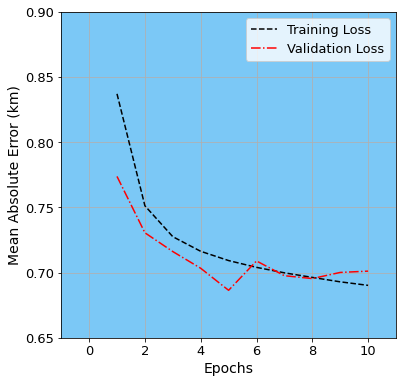

In [0]:
training_loss = [0.8370,0.7512,0.7275,0.7163,0.7092,0.7040,0.6998,0.6963,0.6929,0.6902]
validation_loss = [0.7737,0.7305,0.7161,0.7033,0.6864,0.7089,0.6976,0.6954,0.7001,0.7011]
epochs = np.arange(1,11)

plt.figure(figsize=(6,6))
plt.plot(epochs, training_loss, color='k', linestyle='--', label='Training Loss')
plt.plot(epochs, validation_loss, color='r', linestyle='-.', label='Validation Loss')
plt.xlabel('Epochs', fontsize=14)
plt.gca().set_facecolor('xkcd:lightblue')
plt.ylim(0.65,0.9)
plt.xlim(-1,11)
plt.ylabel('Mean Absolute Error (km)', fontsize=14)
plt.legend(fontsize=13)
plt.grid('on')

for tick in plt.gca().yaxis.get_major_ticks():
    tick.label.set_fontsize(13)
for tick in plt.gca().xaxis.get_major_ticks():
    tick.label.set_fontsize(13)

plt.show()

In [0]:
# Load weights of the best model :
weights_file = '/content/drive/My Drive/project6_dataWeights-005--0.68639.hdf5' # choose the best checkpoint 
NN_model.load_weights(weights_file)
print('Loaded model weights from hdf4 file....')

# Adam Optimizer, RMSE
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
print('Compiled loss functions from weights file....')
print('Evaluating Loaded Model on Test Data....')
score = NN_model.evaluate(test_dataset, test_labels, verbose=0)
print("%s: %.2f%%" % (NN_model.metrics_names[1], score[1]*100))

# Adam Optimizer, Binary Cross-Entropy
NN_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_crossentropy'])
print('Compiled loss functions from weights file....')
print('Evaluating Loaded Model on Test Data....')
score = NN_model.evaluate(test_dataset, test_labels, verbose=0)
print("%s: %.2f%%" % (NN_model.metrics_names[1], score[1]*100))

# RMSProp Optimizer, Accuracy
NN_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
print('Compiled loss functions from weights file....')
print('Evaluating Loaded Model on Test Data....')
score = NN_model.evaluate(test_dataset, test_labels, verbose=0)
print("%s: %.2f%%" % (NN_model.metrics_names[1], score[1]*100))

Loaded model weights from hdf4 file....
Compiled loss functions from weights file....
Evaluating Loaded Model on Test Data....
mean_absolute_error: 68.56%
Compiled loss functions from weights file....
Evaluating Loaded Model on Test Data....
binary_crossentropy: -4688.98%
Compiled loss functions from weights file....
Evaluating Loaded Model on Test Data....
accuracy: 0.05%


## Checking the regression globally and regionally

Loaded model weights from hdf4 file....


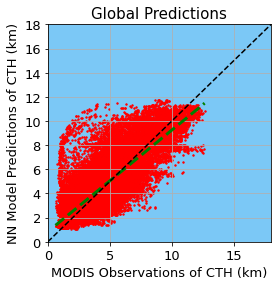

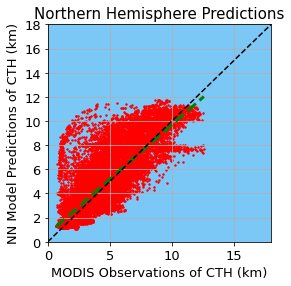

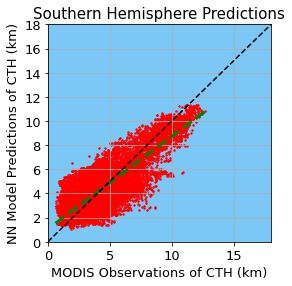

In [0]:
def return_month_data(yr,mn):
  # Let us test the outputs for a month of data from an El-Nino year (2008 August)
  X_input = pd.DataFrame(columns=['lat','lon','SWflux(W/m2)','LWflux(W/m2)','Uwnd_sfc(m/s)','Vwnd_sfc(m/s)','Uwnd_250mb(m/s)',\
                                  'Vwnd_250mb(m/s)','Omega_500mb(mb/day)','SpecHum_850mb(*1/1000 kg/kg)','Sfc_Temp(K)','MSLP(mb)','month'])
  A = pd.read_csv('/content/drive/My Drive/project6_data/Reanalysis_input_'+str(yr)+'_'+str(mn)+'.txt')
  A['month'] = 8
  X_input = pd.concat([X_input,A])

  Y_output = pd.DataFrame()
  A = pd.read_csv('/content/drive/My Drive/project6_data/MODIS_'+str(yr)+'_'+str(mn)+'.txt')
  Y_output = pd.concat([Y_output,A['cth_mean(km)']])
  Y_output.columns = ['Var']
  Y_output = Y_output.reset_index(drop=True)

  return X_input,Y_output

def plot_regression(Y_output,Y_new,title):
  # print(Y_output.shape,Y_new.shape)
  xx=np.arange(0.,19.,1.)
  plt.figure(figsize=(4,4))
  plt.scatter(Y_output['Var'][:], Y_new[:,0], color='r', s=2)
  plt.plot(np.unique(Y_output['Var'][:]), 
           np.poly1d(np.polyfit(Y_output['Var'][:], Y_new[:,0], 1))(np.unique(Y_output['Var'][:])),'g',
           linestyle='--', linewidth=3)
  plt.plot(xx,xx,'k',linestyle='--')
  plt.grid('on')
  plt.xlim(0,18.)
  plt.ylim(0,18.)
  plt.title(title,fontsize=15)
  plt.xlabel('MODIS Observations of CTH (km)', fontsize = 13)
  plt.ylabel('NN Model Predictions of CTH (km)', fontsize = 13)
  plt.gca().set_facecolor('xkcd:lightblue')
  for tick in plt.gca().yaxis.get_major_ticks():
      tick.label.set_fontsize(13)
  for tick in plt.gca().xaxis.get_major_ticks():
      tick.label.set_fontsize(13)

  plt.show()  

# Load weights of the best model :
weights_file = '/content/drive/My Drive/project6_data/project6_dataWeights-005--0.68639.hdf5' # choose the best checkpoint 
NN_model.load_weights(weights_file)
print('Loaded model weights from hdf4 file....')
X_input,Y_output = return_month_data(2013,10)
#Generate Model Predictions for a month of data:
Y_new = NN_model.predict(X_input)
plot_regression(Y_output,Y_new,'Global Predictions')
#Generate Model Predictions for a month of data (Northern Hemisphere):
plot_regression(Y_output.head(int(np.shape(Y_output)[0]/2.)),Y_new[0:int(np.shape(Y_output)[0]/2.),:],
                'Northern Hemisphere Predictions')
#Generate Model Predictions for a month of data (Southern Hemisphere):
plot_regression(Y_output.tail(int(np.shape(Y_output)[0]/2.)),Y_new[int(np.shape(Y_output)[0]/2.):np.shape(Y_output)[0],:],
                'Southern Hemisphere Predictions')

## Histogram of differences between observations and predictions

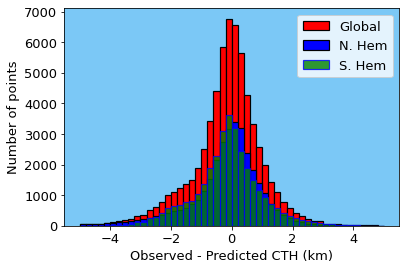

(-0.19896426721871632,
 -0.25984290137482274,
 -0.1380856330626099,
 1.227394901416256,
 1.3353079973211222,
 1.1056837812602973)

In [0]:
Y_output['Var'][Y_output['Var']<0]=np.nan
Y_new[np.where(Y_new[:,0]<0),0]=np.nan
plt.hist(Y_output['Var'][:]-Y_new[:,0],range=(-5.,5.),bins=50,edgecolor='black',color='r',linewidth=1.2, label='Global')
plt.hist(Y_output.head(int(np.shape(Y_output)[0]/2.))['Var'][:]-Y_new[0:int(np.shape(Y_output)[0]/2.),0],range=(-5.,5.),bins=50,
         edgecolor='black',color='b',linewidth=1.2, label='N. Hem')
plt.hist(Y_output.tail(int(np.shape(Y_output)[0]/2.))['Var'][:]-Y_new[int(np.shape(Y_output)[0]/2.):np.shape(Y_output)[0],0],
         range=(-5.,5.),bins=50,edgecolor='b',color='g', alpha=0.8, linewidth=1.2,label='S. Hem')
plt.xlabel('Observed - Predicted CTH (km)', fontsize = 13)
plt.ylabel('Number of points', fontsize = 13)
plt.gca().set_facecolor('xkcd:lightblue')
for tick in plt.gca().yaxis.get_major_ticks():
    tick.label.set_fontsize(13)
for tick in plt.gca().xaxis.get_major_ticks():
      tick.label.set_fontsize(13)
plt.legend(fontsize=13)
plt.show()
np.nanmean(Y_output['Var'][:]-Y_new[:,0]),np.nanmean(Y_output.head(int(np.shape(Y_output)[0]/2.))['Var'][:]-Y_new[0:int(np.shape(Y_output)[0]/2.),0]),\
np.nanmean(Y_output.tail(int(np.shape(Y_output)[0]/2.))['Var'][:]-Y_new[int(np.shape(Y_output)[0]/2.):np.shape(Y_output)[0],0]),\
np.nanstd(Y_output['Var'][:]-Y_new[:,0]),np.nanstd(Y_output.head(int(np.shape(Y_output)[0]/2.))['Var'][:]-Y_new[0:int(np.shape(Y_output)[0]/2.),0]),\
np.nanstd(Y_output.tail(int(np.shape(Y_output)[0]/2.))['Var'][:]-Y_new[int(np.shape(Y_output)[0]/2.):np.shape(Y_output)[0],0]),\

## Global distribution of predicted CTH and CTH errors

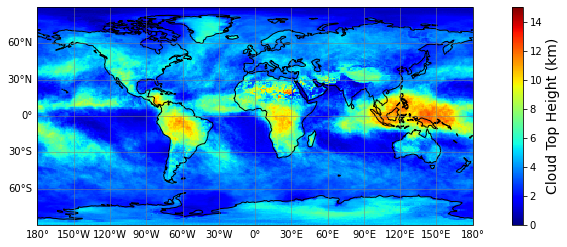

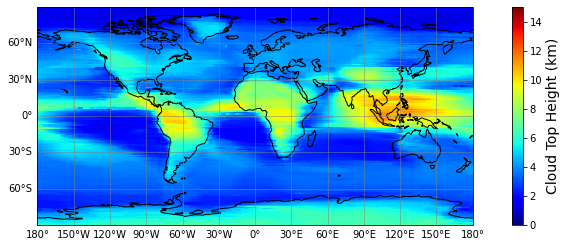

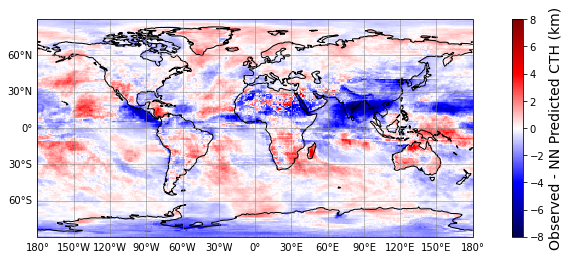

In [0]:
lats = np.linspace(-90,90,180)
lons = np.linspace(-180,180,360)

cth_gridded = np.reshape(Y_output['Var'].values, (180,360))
plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-180,180,90,-90], crs=ccrs.PlateCarree())
cs2 = plt.pcolormesh(lons, lats, np.flipud(cth_gridded), 
              transform=ccrs.PlateCarree(), cmap='jet')
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='-')
gl.xlocator = mticker.FixedLocator(np.arange(-180,181,30))
gl.ylocator = mticker.FixedLocator(np.arange(-90,91,30))
gl.xlabels_top = False
gl.ylabels_right = False
ax.coastlines()
plt.clim(0,15)
cb = plt.colorbar(cs2, shrink=0.4, pad=0.07)
cb.set_label(r'Cloud Top Height (km)', fontsize=14)
plt.show()

cth_gridded_new = np.reshape(Y_new[:,0], (180,360))
plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-180,180,90,-90], crs=ccrs.PlateCarree())
cs2 = plt.pcolormesh(lons, lats, np.flipud(cth_gridded_new), 
              transform=ccrs.PlateCarree(), cmap='jet')
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='-')
gl.xlocator = mticker.FixedLocator(np.arange(-180,181,30))
gl.ylocator = mticker.FixedLocator(np.arange(-90,91,30))
gl.xlabels_top = False
gl.ylabels_right = False
ax.coastlines()
plt.clim(0,15)
cb = plt.colorbar(cs2, shrink=0.4, pad=0.07)
cb.set_label(r'Cloud Top Height (km)', fontsize=14)
plt.show()

plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-180,180,90,-90], crs=ccrs.PlateCarree())
cs2 = plt.pcolormesh(lons, lats, np.flipud(cth_gridded-cth_gridded_new), 
              transform=ccrs.PlateCarree(), cmap='seismic')
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='-')
gl.xlocator = mticker.FixedLocator(np.arange(-180,181,30))
gl.ylocator = mticker.FixedLocator(np.arange(-90,91,30))
gl.xlabels_top = False
gl.ylabels_right = False
ax.coastlines()
plt.clim(-8,8)
cb = plt.colorbar(cs2, shrink=0.4, pad=0.07)
cb.set_label(r'Observed - NN Predicted CTH (km)', fontsize=14)
plt.show()
plt.show()

Anomaly Predictions

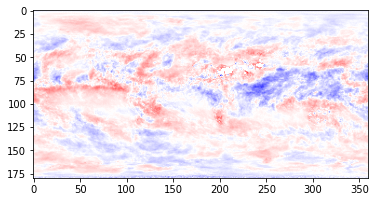

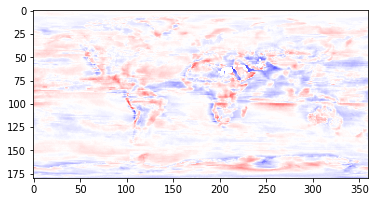

In [0]:
#Long-term August means
cth_gridded_lt = np.zeros((180,360))
c = np.zeros((180,360))
for yr in range(2005,2020):
  A = pd.read_csv('/content/drive/My Drive/project6_data/MODIS_'+str(yr)+'_8.txt')
  cth = A['cth_mean(km)'].values
  cth[np.where(cth<0.)] = np.nan
  cth_gridded_lt = cth_gridded_lt + np.reshape(cth, (180,360))
  c.ravel()[np.where(np.isnan(cth)==False)]=c.ravel()[np.where(np.isnan(cth)==False)]+1
cth_gridded_lt = cth_gridded_lt/c
# August CTH anomalies
cth_anomalies = cth_gridded_lt - cth_gridded
plt.imshow(cth_gridded_lt - cth_gridded, vmin=-10, vmax=10., cmap='seismic')
plt.show()
# August CTH anomalies predicted
cth_anomalies_new = cth_gridded_lt - cth_gridded_new
plt.imshow(cth_anomalies_new, vmin=-10, vmax=10., cmap='seismic')
plt.show()